<h1><center> R to Python<br><br>Marketing Research and Analytics<br><br>CHAPTER 5: Comparing Groups: Tables and Visualizations</center></h1>

This tutorial aims at providing the python code for the book *R for Marketing Research and Analytics* (Chapman, Christopher N., McDonnell Feit, Elea). We will follow the chapters of the book and provide a Python version of the R code presented in the book.
<br>In this tutorial, we tackle chapter 5 of the book. Please look at the other tutorials for other chapters.

## STEP 1: Importing the required libraries

In [2]:
#Libraries for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import calendar
from sklearn.feature_selection import chi2
from io import StringIO
import scipy as sp
from scipy import stats
import astropy
from astropy import stats
from statsmodels.distributions.empirical_distribution import ECDF
#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Below code allows for the graphs to be plotted directly under the coding cell
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 7

## STEP 2: Creating the dataset for consumer segment data
<br>**Description of the dataset**:
Data are collected from N=300 respondents on *age*, *gender*, *income*, *number of children*, whether or not they *own or rent* their homes, whether or not they currently *subscribe* to the offered service or not. 
<br>In this data, each respondent has been assigned to one of four consumer segments:
1) Suburb Mix
2) Urban Mix
3) Travelers
4) Moving up
<br><br>**Description of the variables**:
- *age*: age of the respondent.
- *gender*: male or female.
- *income*: income of the respondent.
- *kids*: number of kids of the respondent.
- *ownHome*: whether the respondent own or rent his home.
- *subscribe*: whether the respondent currently subscribe to the offered service.
- *Segment*: segment to which the respondent belongs.

In [3]:
#Create an empty dataframe that we will fill afterwards
columns_names=["age", "gender", "income", "kids","ownHome", "subscribe", "Segment"]
columns_names_1=["age", "gender", "income", "kids","ownHome", "subscribe"]
seg_df=pd.DataFrame(columns=columns_names)

In [4]:
#Creating the segments: "Suburb mix", "Urban hip", "Travelers", "Moving up"
segVars=["age", "gender", "income", "kids","ownHome", "subscribe"]
segVarType=["norm", "binom", "norm", "pois", "binom", "binom" ]
segNames=["Suburb mix", "Urban hip", "Travelers", "Moving up"]
segsize=[100, 50, 80, 70]

In [5]:
#Create the means of each variable by segment
segMeans=np.array([[40, 0.5, 55000, 2, 0.5, 0.1], 
                   [24, 0.7, 21000, 1, 0.2, 0.2], 
                   [58, 0.5, 64000, 0, 0.7, 0.05], 
                   [36, 0.3, 52000, 2, 0.3, 0.2]])

In [6]:
#Create the standard deviation of each variable by segment
segSDs=np.array([[5, np.nan, 12000, np.nan, np.nan, np.nan],
                 [2, np.nan, 5000, np.nan, np.nan, np.nan],
                 [8, np.nan, 21000, np.nan, np.nan, np.nan],
                 [4, np.nan, 10000, np.nan, np.nan, np.nan]])

In [7]:
#Final Segment data generation
rnd.seed(12)

In [8]:
#Iterate over segments and create data for each
#Print number and segment name
for i in range(0, len(segNames)):
    print("{} {}".format(i+1, segNames[i]))
    #Create an empty matrix to hold this particular segment data
    this_seg=pd.DataFrame(columns=columns_names_1)
    #Within each segment, iterate over variables and draw appropriate random data
    for j in range(0, len(segVars)):
        #Iterate over each variable type
        if segVarType[j]=="norm": #Draw normal random variable
            this_seg.iloc[:,j]=np.random.normal(segMeans[i,j], segSDs[i,j], segsize[i])
        elif segVarType[j]=="pois":#Draw counts
            this_seg.iloc[:,j]=np.random.poisson(lam=segMeans[i,j], size=segsize[i])
        elif segVarType[j]=="binom": #Draw binomials
            this_seg.iloc[:,j]=np.random.binomial(1, segMeans[i,j], segsize[i])
        else:
            print("Bad segment data type: {}".format(segVarType[j]))
            break
    this_seg["Segment"]=segNames[i]
    frames=[seg_df, this_seg]
    seg_df=pd.concat(frames)

1 Suburb mix
2 Urban hip
3 Travelers
4 Moving up


In [9]:
#Checking types of variables of seg_df dataframe
seg_df.dtypes    

age          float64
gender        object
income       float64
kids          object
ownHome       object
subscribe     object
Segment       object
dtype: object

In [ ]:
#Replace numbers by labels for categorical variables

<font color=red>R code</font>: *Converting variables to categorical: factor()*
<br>$factor(seg{\_}df\$ownHome,\,labels=c("ownNo", "ownYes"))$

In [10]:
#Python code: you need two steps as there does not exist a function like factor() in R.
#Put labels instead of numbers for categorical variables
seg_df["gender"]=seg_df["gender"].replace({0: "Female", 1:"Male"})
seg_df["ownHome"]=seg_df["ownHome"].replace({0:"ownNo", 1:"ownYes"})
seg_df["subscribe"]=seg_df["subscribe"].replace({0:"subNo",1:"subYes"})
#Changing data types to categorical
seg_df["gender"]=seg_df["gender"].astype('category')
seg_df["ownHome"]=seg_df["ownHome"].astype('category')
seg_df["subscribe"]=seg_df["subscribe"].astype('category')

In [11]:
#Summarize the dataset
seg_df.describe()

,age,income
count,300.000000,300.000000
mean,41.328720,49956.972735
std,13.294275,19371.881238
min,19.626641,13901.458840
25%,32.674609,38977.185851
50%,38.891085,50365.367962
75%,48.798944,62430.667260
max,79.142541,126722.193001


In [57]:
#Export the dataset as csv for later use in subsequent chapters
seg_df.to_csv('C:/Users/cdague/Documents/02_Data_science_WORK/01_Data_tutorials/02_Marketing_R_to_Python/seg_df.csv',
              index=False)

### Finding Descriptives by Group

<font color=red>R code</font>: *Data Frame indexing*
<br>$mean(seg{\_}df\$income[\,seg{\_}df\$Segment == ``Moving\,up``]\,)$
<br>$by(seg{\_}df\$income,\,seg{\_}df\$Segment, \,mean)$

In [13]:
#Python code
seg_df["income"].groupby(seg_df["Segment"]=="Moving up").mean()

Segment
False    49946.145812
True     49992.546912
Name: income, dtype: float64

In [14]:
seg_df[seg_df['Segment']=='Moving up'].groupby('Segment')['income'].mean()

Segment
Moving up    49992.546912
Name: income, dtype: float64

In [16]:
seg_inc_mean=pd.DataFrame(seg_df.groupby('Segment')['income'].mean())
seg_inc_mean

,income
Segment,
Moving up,49992.546912
Suburb mix,56195.586138
Travelers,60352.471426
Urban hip,20797.144176


In [17]:
#Add income mean by segment to dataframe

<font color=red>R code</font>: *Add mean column to dataframe*
<br>$seg{\_}income{\_}mean <- aggregate(seg{\_}df$income, list(seg_df$Segment), mean)$
<br>$seg{\_}df\$segIncome <-seg{\_}income{\_}mean[ \,seg{\_}df\$Segment, 2]\,$

In [20]:
#Python code
seg_df['segIncome']=seg_df.groupby('Segment')['income'].transform('mean')
seg_df.sample(5)

,age,gender,income,kids,ownHome,subscribe,Segment,segIncome
27,39.769571,Female,39211.382948,0,ownNo,subYes,Moving up,49992.546912
23,43.500168,Male,80510.783687,0,ownYes,subNo,Travelers,60352.471426
22,25.816440,Female,18412.100738,1,ownNo,subNo,Urban hip,20797.144176
51,63.570698,Female,80575.811892,0,ownYes,subNo,Travelers,60352.471426
11,60.494289,Male,61544.306025,0,ownNo,subNo,Travelers,60352.471426


### Descriptives for Two-Way Groups

<font color=red>R code</font>: *Aggregation and group by*
<br>$aggregate(income\sim Segment + ownHome,\,data=seg{\_}df,\,mean)$

In [21]:
#Aggregate in Python
seg_df.groupby(["Segment", "subscribe"]).agg({'income':[np.mean, max, min]})

income                             
                              mean            max           min
Segment    subscribe                                           
Moving up  subNo      49638.446588   74545.906937  32504.260674
           subYes     51096.506746   64907.037996  31244.512731
Suburb mix subNo      56166.185033   87741.752598  24337.569707
           subYes     56754.207135   76708.935151  34926.880695
Travelers  subNo      59977.157929  126722.193001  14335.347492
           subYes     65982.173890   93352.507071  36115.561805
Urban hip  subNo      20452.665675   30119.948308  14339.830207
           subYes     22366.435124   31113.054056  13901.458840

<font color=green>**Cracking the code**</font>: **$DataFrameGroupBy.agg$**
<br>This function is used to aggregate the data. In the above example, we calculate the mean, the max and the min of income depending on two categories. 
<br>**Syntax**: $DataFrame.groupby('category').agg(function)$
<br>**Reference**: http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

In [22]:
agg_data=seg_df.groupby(["Segment", "subscribe"], as_index=False).agg({'income':[np.mean]})

In [24]:
#Rename the columns in an appropriate manner
agg_data.columns = [" ".join(x) for x in agg_data.columns.ravel()]
agg_data.head()

,S e g m e n t,s u b s c r i b e,i n c o m e m e a n
0,Moving up,subNo,49638.446588
1,Moving up,subYes,51096.506746
2,Suburb mix,subNo,56166.185033
3,Suburb mix,subYes,56754.207135
4,Travelers,subNo,59977.157929


In [26]:
#Produce series for output
data_agg_series=seg_df.groupby("Segment")['income'].mean()
data_agg_series

Segment
Moving up     49992.546912
Suburb mix    56195.586138
Travelers     60352.471426
Urban hip     20797.144176
Name: income, dtype: float64

In [27]:
#Produce dataframe for output: instead a single [], put double [[]] for the income variable.This produces a DF
data_agg_frame=seg_df.groupby("Segment", as_index=False)[['income']].mean()
data_agg_frame

,Segment,income
0,Moving up,49992.546912
1,Suburb mix,56195.586138
2,Travelers,60352.471426
3,Urban hip,20797.144176


<font color=red>R code</font>: *Crosstab*
<br>$with(seg{\_}df,\,table(Segment,\,ownHome))$

In [29]:
#Python code: crosstab: kids by segment
seg_kids=pd.crosstab(seg_df["Segment"], seg_df["kids"], margins=False)
seg_kids.reset_index(inplace=True)
seg_kids.rename(columns={'index':'Segment'}, inplace=True)
seg_kids

kids,Segment,0,1,2,3,4,5,7,9
0,Moving up,9,13,24,18,4,2,0,0
1,Suburb mix,11,30,35,18,2,2,1,1
2,Travelers,80,0,0,0,0,0,0,0
3,Urban hip,16,23,9,2,0,0,0,0


<font color=green>**Cracking the code**</font>: **$pd.crosstab$**
<br>Compute a simple cross-tabulation of two (or more) factors.
<br>**Syntax**: $pd.crosstab(group{\_}rows, group{\_}columns,\,margins=False)$, margins=True adds row/column subtotals
<br>**Reference**: http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [30]:
#total number of kids by segment
seg_df.groupby("Segment", as_index=False)[['kids']].sum()

,Segment,kids
0,Moving up,141
1,Suburb mix,188
2,Travelers,0
3,Urban hip,47


In [ ]:
#Quick overview of the data with crosstabs for categorical data (with subtotals)

In [31]:
pd.crosstab(seg_df["Segment"], seg_df["subscribe"], margins=True)

subscribe,subNo,subYes,All
Segment,,,
Moving up,53,17,70
Suburb mix,95,5,100
Travelers,75,5,80
Urban hip,41,9,50
All,264,36,300


In [32]:
pd.crosstab(seg_df["Segment"], seg_df["kids"], margins=True)

kids,0,1,2,3,4,5,7,9,All
Segment,,,,,,,,,
Moving up,9,13,24,18,4,2,0,0,70
Suburb mix,11,30,35,18,2,2,1,1,100
Travelers,80,0,0,0,0,0,0,0,80
Urban hip,16,23,9,2,0,0,0,0,50
All,116,66,68,38,6,4,1,1,300


In [33]:
pd.crosstab(seg_df["Segment"], seg_df["ownHome"], margins=True)

ownHome,ownNo,ownYes,All
Segment,,,
Moving up,43,27,70
Suburb mix,36,64,100
Travelers,20,60,80
Urban hip,42,8,50
All,141,159,300


In [34]:
#When do not want the totals
pd.crosstab(seg_df["Segment"], seg_df["ownHome"], margins=False)

ownHome,ownNo,ownYes
Segment,,
Moving up,43,27
Suburb mix,36,64
Travelers,20,60
Urban hip,42,8


In [35]:
#With more than one filter
pd.crosstab([seg_df["Segment"], seg_df["subscribe"]], seg_df["ownHome"], margins=True)

ownHome               ownNo  ownYes  All
Segment    subscribe                    
Moving up  subNo         32      21   53
           subYes        11       6   17
Suburb mix subNo         34      61   95
           subYes         2       3    5
Travelers  subNo         19      56   75
           subYes         1       4    5
Urban hip  subNo         34       7   41
           subYes         8       1    9
All                     141     159  300

### Visualization by groups: Frequencies and proportions

#### Countplots

<font color=red>R code</font>: *Countplot*
<br>$histogram(\sim subscribe \mid Segment, data=seg{\_}df,\,type=``count``)$

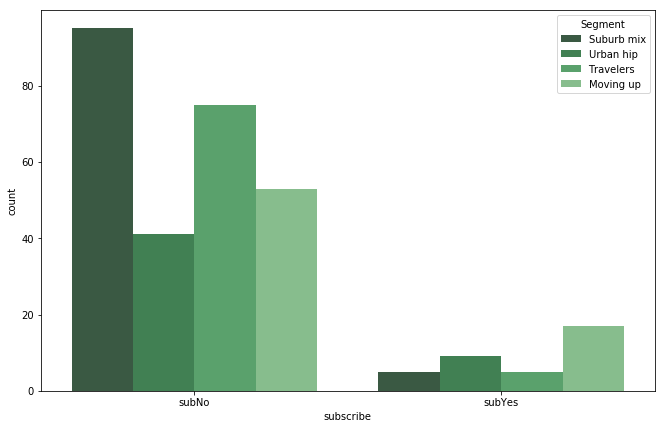

In [36]:
#Python code
sns.countplot(x="subscribe",
              data=seg_df,
              hue="Segment",
              palette='Greens_d',
              orient="h"
              )

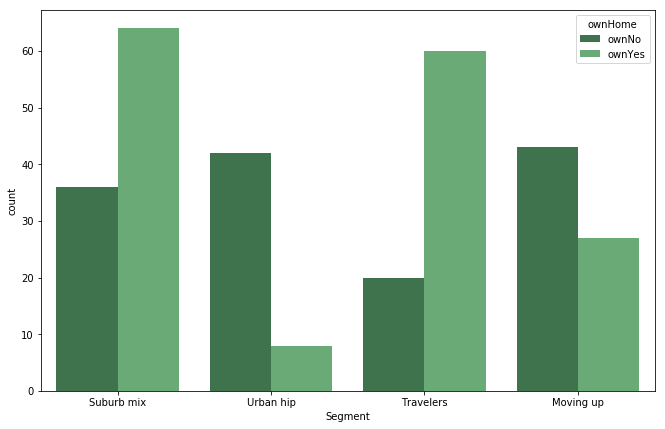

In [37]:
sns.countplot(x="Segment",
              data=seg_df,
              hue="ownHome",
              palette='Greens_d',
              orient="h"
              )

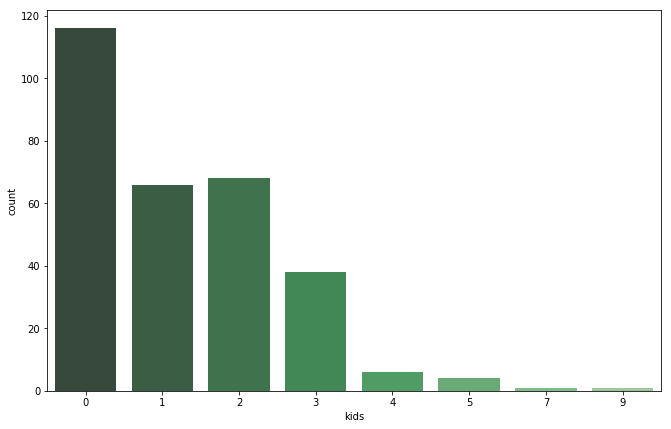

In [39]:
sns.countplot(x='kids', data=seg_df, palette="Greens_d")

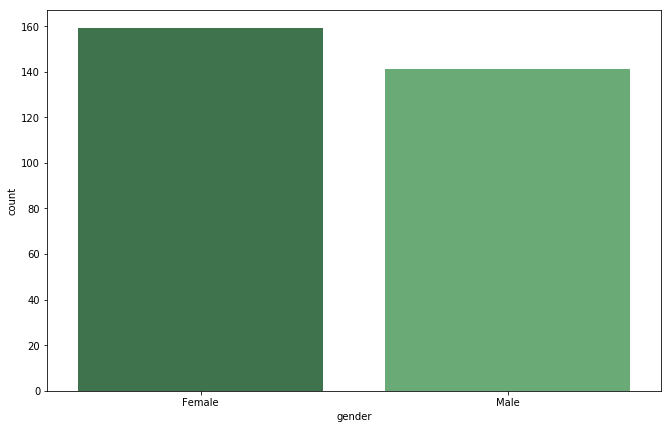

In [40]:
sns.countplot(x='gender', data=seg_df, palette="Greens_d")

#### Factorplot

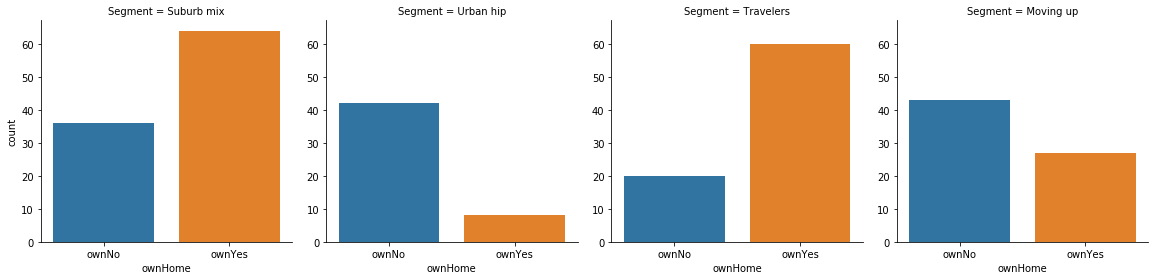

In [38]:
#Python factor plot
sns.factorplot("ownHome", col="Segment",
               data=seg_df,
               kind='count')

<font color=green>**Cracking the code**</font>: **$sns.factorplot$**
<br>Draw a categorical plot onto a FacetGrid. The default plot is a point plot.
<br>**Syntax**: $sns.factorplot(x,col, data, kind)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.factorplot.html 

### Visualization by groups: continuous variables

#### Barplot

<font color=red>R code</font>: *Barplot*
<br>$seg{\_}income{\_}agg<-aggregate(income\sim Segment + ownHome, data=seg{\_}df,\,mean)$
<br>$barchart(income\sim Segment,\,data=seg{\_}income{\_}agg,\,groups=ownHome)$

In [41]:
#Python code
sns.set(style="ticks", color_codes=True)

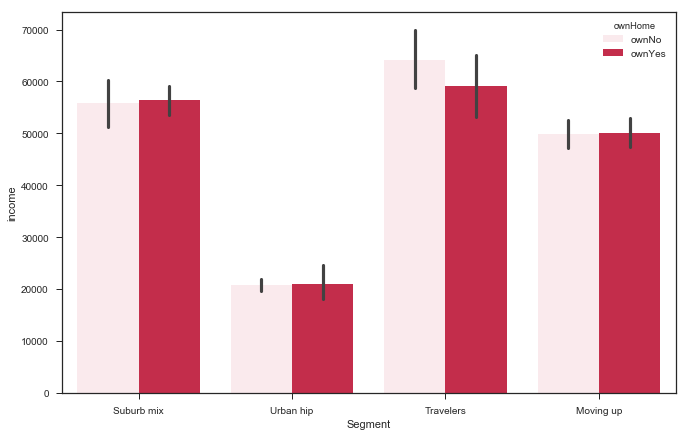

In [42]:
#Python : barplot
sns.barplot(x='Segment', y='income',
            data=seg_df,
            hue='ownHome',
            color="crimson")

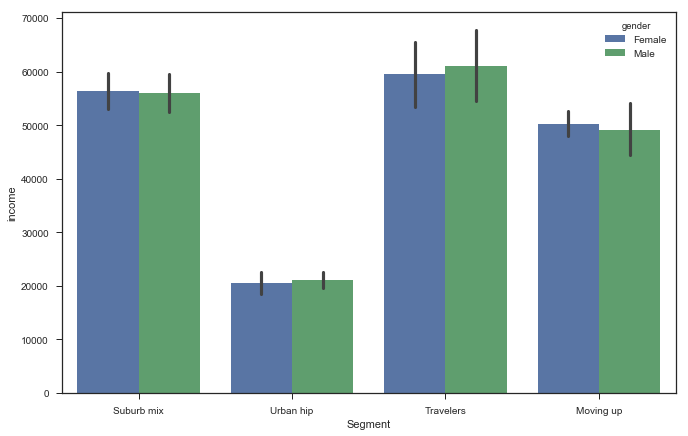

In [43]:
sns.barplot(x='Segment', y='income',
            data=seg_df,
            hue='gender'
            )

<font color=green>**Cracking the code**</font>: **$sns.barplot$**
<br>Represents an estimate of central tendency for a numeric variable with the height of each rectangle.
<br>**Syntax**: $sns.barplot(x,data, hue, orient)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.barplot.html

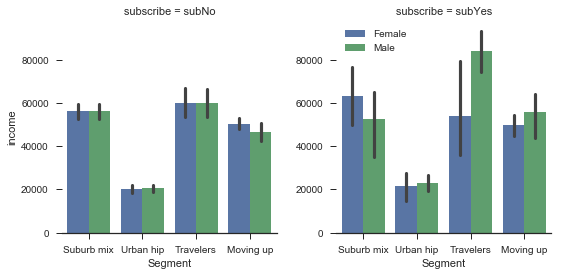

In [49]:
#Make a complicated graph combining matplotlib and seaborn
g=sns.factorplot(x="Segment", y="income", 
               hue="gender",
               col="subscribe", 
               data=seg_df, 
               kind="bar",
               legend=False)
g.despine(left=True)
plt.legend(loc="upper left")
plt.show()

<font color=green>**Cracking the code**</font>: **$sns.despine$**
<br>Remove the top and right spines from plot(s).
<br>**Syntax**: $sns.despine(fig,ax, position)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.despine.html

#### Boxplot

<font color=red>R code</font>: *Boxplot*
<br>$boxplot(income \sim Segment,\,data=seg{\_}df,\,yaxt=''n'',\,ylab=''Income(\$k)'')$

In [ ]:
#Python code: Boxplot

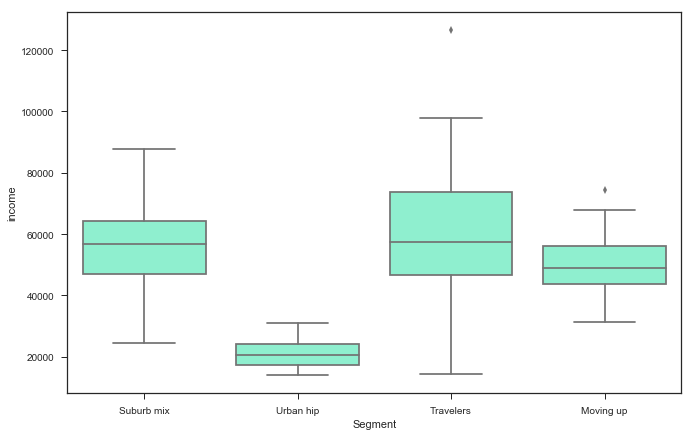

In [45]:
sns.boxplot(x="Segment", y="income",
            data=seg_df,
            color="aquamarine")

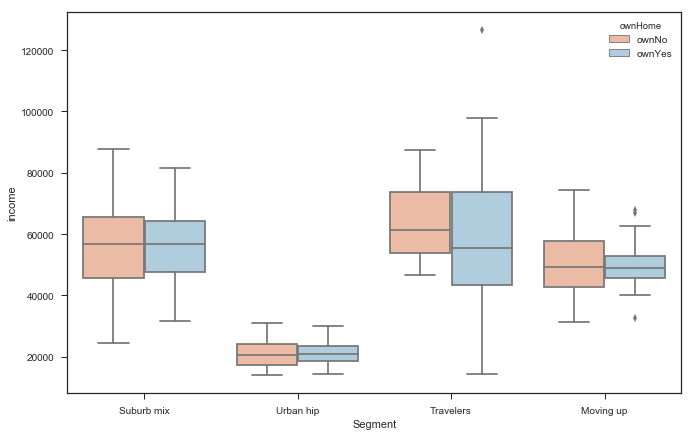

In [46]:
sns.boxplot(x="Segment", y="income",
            data=seg_df,
            hue='ownHome',
            palette="RdBu")

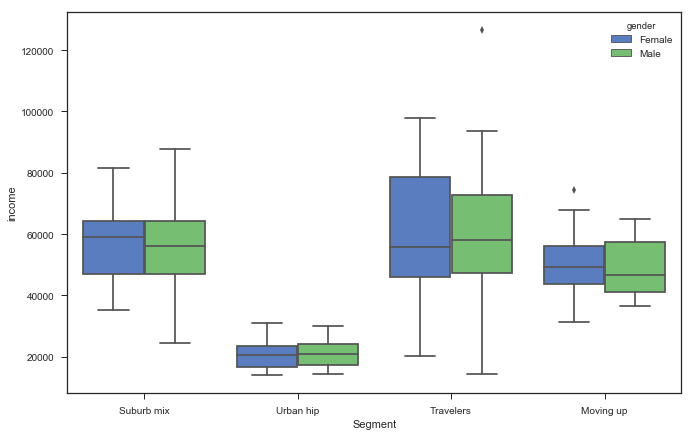

In [47]:
sns.boxplot(x="Segment", y="income",
            data=seg_df,
            hue='gender',
            palette='muted'
            )

<font color=green>**Cracking the code**</font>: **$sns.boxplot$**
<br>Draw a box-plot to show distribution with respect to categories. A Boxplot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of categorical variable. Below is a schema explaining what is represented on the boxplot.
<img src="boxplot.png" width="300">
<br>**Syntax**: $sns.boxplot(x, data, hue, orient)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.boxplot.html

#### Swarmplot

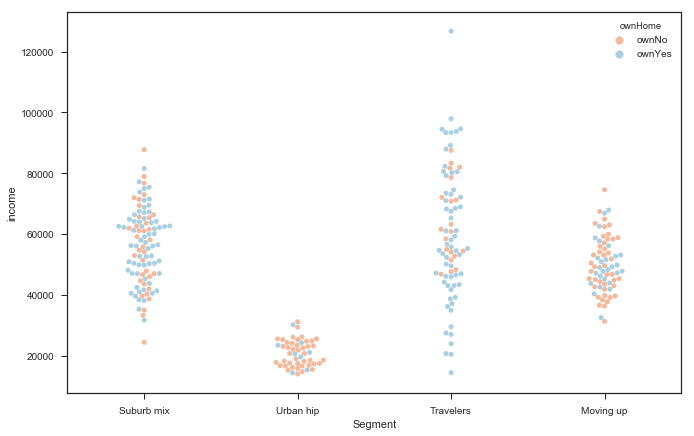

In [48]:
#Python swarmplot
sns.swarmplot(x="Segment", y="income",
            data=seg_df,
            hue='ownHome',
            palette="RdBu")

<font color=green>**Cracking the code**</font>: **$sns.swarmplot$**
<br>Draw a categorical scatterplot with non-overlapping points. 
<br>**Syntax**: $sns.swarmplot(x, data, hue, orient)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.swarmplot.html

#### Stacked column chart

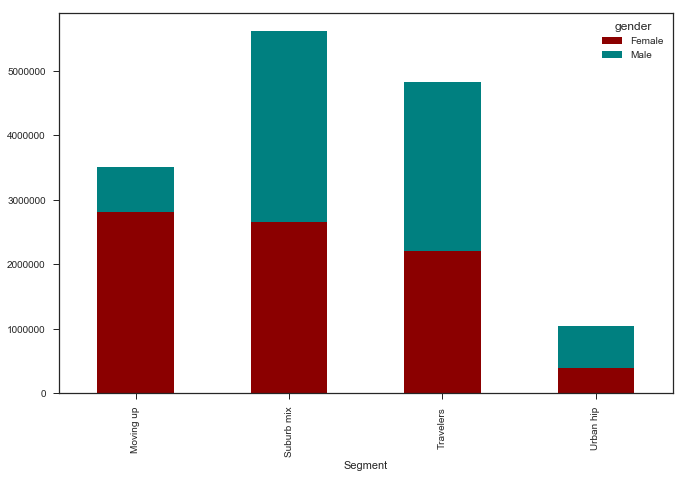

In [55]:
#Python code
var=seg_df.groupby(['Segment', 'gender'])['income'].sum()
var.unstack().plot(kind='bar',
                   stacked=True,
                   color=["darkred", "teal"],
                   grid=False
                   )

#### Scatterplot

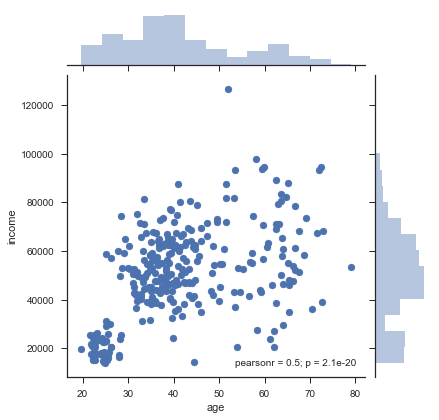

In [51]:
#Python code
fig=sns.jointplot(x='age',
                  y='income',
                  data=seg_df)

<font color=green>**Cracking the code**</font>: **$sns.jointplot$**
<br>Draw a plot of two variables with bivariate and univariate graphs
<br>**Syntax**: $sns.jointplot(x, y, data, kind)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.jointplot.html

#### Density plot

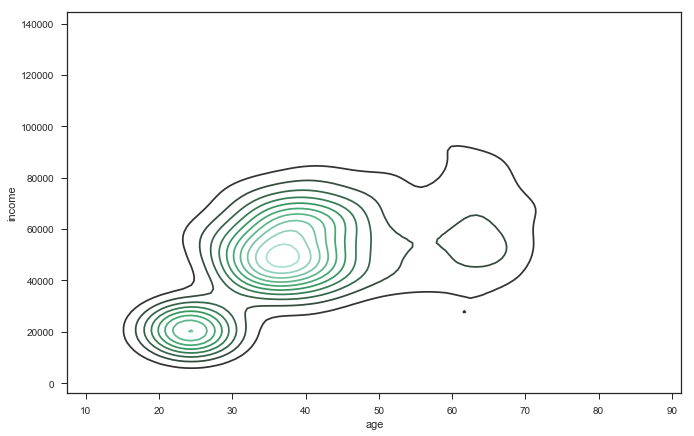

In [52]:
#Python code
sns.kdeplot(seg_df["age"], seg_df["income"])

<font color=green>**Cracking the code**</font>: **$sns.kdeplot$**
<br>Fit and plot a univariate or bivariate kernel density estimate.
<br>**Syntax**: $sns.kdeplot(data,\,data2)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

#### Distribution plot

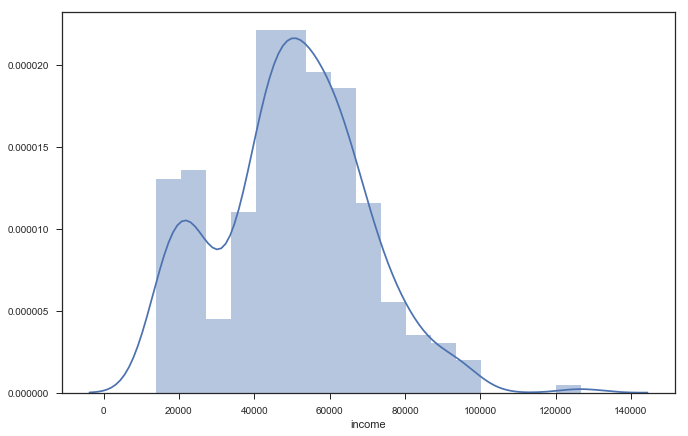

In [53]:
#Python code
sns.distplot(seg_df["income"])

<font color=green>**Cracking the code**</font>: **$sns.distplot$**
<br>Flexibily plot a univariate distribution of observations.
<br>**Syntax**: $sns.distplot(data,\,bins,\,hist,\,kde,\,color)$
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.distplot.html